In [61]:
# Import de librerias
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [62]:
# Datasets de entrenamiento y testeo
(X_train, y_train),\
  (x_test, y_test) = keras.datasets.mnist.load_data()

In [63]:
print(len(X_train)) # datos de entrenamiento
print(len(x_test)) # datos de testeo

60000
10000


(28, 28)


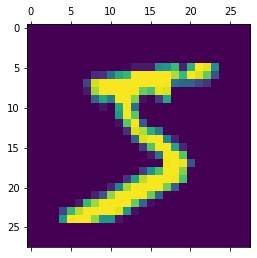

In [64]:
print(X_train[0].shape) # dimensiones
plt.matshow(X_train[0]) # display

In [65]:
# Normalizar los datasets, es decir:
# dividir cada elemento de X_train y x_test por el numero de píxeles (255)
X_train = X_train/255
x_test = x_test/255

# Flattening the dataset in order to compute for model building
# convierte los elementos de la matriz de imagenes de entrada en un array plano
X_train_flatten = X_train.reshape(len(X_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [66]:
import keras.backend as K
# Funcion para calcular el F1 Score
def f1_score(y_true, y_pred):
  # y_true --> son los resultados verdaderos
  # y_pred --> son los resultados de la predicción

  # Calculos para true positive, false positive, y false negative
  true_positives = K.sum(y_pred * y_true)
  false_positives = K.sum(y_pred * (1 - y_true))
  false_negatives = K.sum((1 - y_pred) * y_true)

  # Se calcula la precision y el recall
  precision = true_positives / (true_positives + false_positives)
  recall = true_positives / (true_positives + false_negatives)

  # Calculo de F1 score
  f1_score = 2 * (precision * recall) / (precision + recall)

  return f1_score

In [67]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),
                       activation='sigmoid')]) # funcion de activacion

model.compile(
    optimizer='adam', # algoritmo utilizado para minimizar la función de costo
    loss='sparse_categorical_crossentropy', # funcion de costo a minimizar
    metrics=['accuracy', f1_score]) # metricas para calcular exactitud y F1

In [68]:
                                                                                                                                          # Entrenamiento
hist = model.fit(X_train_flatten, y_train, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.5564 - accuracy: 0.8568 - f1_score: 0.6319
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3253 - accuracy: 0.9094 - f1_score: 0.5580
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2965 - accuracy: 0.9174 - f1_score: 0.5461
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.2831 - accuracy: 0.9206 - f1_score: 0.5376
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2743 - accuracy: 0.9230 - f1_score: 0.5328


In [69]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2705 - accuracy: 0.9253 - f1_score: 0.5345


[0.27052682638168335, 0.9253000020980835, 0.5345106720924377]

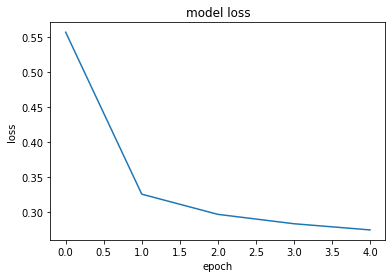

In [70]:
plt.plot(hist.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

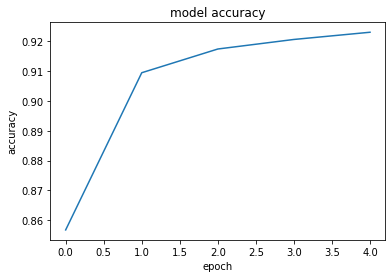

In [71]:
plt.plot(hist.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

NameError: ignored